<a href="https://colab.research.google.com/github/aniketbachhas/InfinitySaga/blob/main/Infinity_Saga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [29]:
import numpy as np
import pandas as pd

Loading the dataset

In [30]:
data = pd.read_csv('/content/MCU_movies_Dataset.csv', encoding = 'unicode_escape')
data.shape

(33, 18)

In [31]:
data.head(3)

,Id,Title,Phase,Genres,Release Date,Director,ScreenWriter,Producer,Cast,Plot,Language,Filming Locations,Status,Movie Rating,Review Rating,Movie Run Time,Budget,Box office
0,1,Iron Man,Phase One,"Action, Adventure, Sci-Fi",02-05-2008,Jon Favreau,Mark Fergus & Hawk Ostby and Art Marcum & Matt...,Avi Arad and Kevin Feige,"Robert Downey Jr., Gwyneth Paltrow, Terrence H...","After being held captive in an Afghan cave, bi...","English, Persian, Urdu, Arabic, Hungarian","Palmdale Regional Airport, Palmdale, Californi...",Released,PG-13,7.9,126 min,140000000.0,585174222.0
1,2,The Incredible Hulk,Phase One,"Action, Adventure, Sci-Fi",13-06-2008,Louis Leterrier,Zak Penn,"Avi Arad, Gale Anne Hurd and Kevin Feige","Edward Norton, Liv Tyler, Tim Roth, William Hurt","Bruce Banner, a scientist on the run from the ...","English, Portuguese, Spanish","Cherry Street Bridge, Toronto, Ontario, Canada",Released,PG-13,6.7,112 min,150000000.0,263427551.0
2,3,Iron Man 2,Phase One,"Action, Adventure, Sci-Fi",07-05-2010,Jon Favreau,Justin Theroux,Kevin Feige,"Robert Downey Jr., Mickey Rourke, Gwyneth Palt...",With the world now aware of his identity as Ir...,"English, French, Russian","D.C. Stages, 1360 East 6th Street, Downtown, L...",Released,PG-13,7.0,124 min,200000000.0,623933331.0


Data Cleaning

In [32]:
columns = list(data.columns)
columns

['Id',
 'Title',
 'Phase',
 'Genres',
 'Release Date',
 'Director',
 'ScreenWriter',
 'Producer',
 'Cast',
 'Plot',
 'Language',
 'Filming Locations',
 'Status',
 'Movie Rating',
 'Review Rating',
 'Movie Run Time',
 'Budget',
 'Box office']

In [33]:
data_req = data[['Id',
                 'Title',
                 'Phase',
                 'Genres',
                 'Release Date',
                 'Review Rating',
                 'Movie Run Time',
                 'Budget',
                 'Box office']]
data_req.head(3)

,Id,Title,Phase,Genres,Release Date,Review Rating,Movie Run Time,Budget,Box office
0,1,Iron Man,Phase One,"Action, Adventure, Sci-Fi",02-05-2008,7.9,126 min,140000000.0,585174222.0
1,2,The Incredible Hulk,Phase One,"Action, Adventure, Sci-Fi",13-06-2008,6.7,112 min,150000000.0,263427551.0
2,3,Iron Man 2,Phase One,"Action, Adventure, Sci-Fi",07-05-2010,7.0,124 min,200000000.0,623933331.0


In [34]:
infinitysaga = pd.concat([data_req[data_req['Phase'] == "Phase One"], 
                          data_req[data_req['Phase'] == "Phase Two"], 
                          data_req[data_req['Phase'] == "Phase Three"]])
infinitysaga.head(3)

,Id,Title,Phase,Genres,Release Date,Review Rating,Movie Run Time,Budget,Box office
0,1,Iron Man,Phase One,"Action, Adventure, Sci-Fi",02-05-2008,7.9,126 min,140000000.0,585174222.0
1,2,The Incredible Hulk,Phase One,"Action, Adventure, Sci-Fi",13-06-2008,6.7,112 min,150000000.0,263427551.0
2,3,Iron Man 2,Phase One,"Action, Adventure, Sci-Fi",07-05-2010,7.0,124 min,200000000.0,623933331.0


Saving the Modified Dataset

In [35]:
infinitysaga.to_csv('InfinitySaga.csv')

[ADDITIONAL] Compare Run Time, Rating, Budget, Box Office

In [36]:
from matplotlib import pyplot
import seaborn as sns

Text(0, 0.5, 'Box Office Collection (in Billions)')

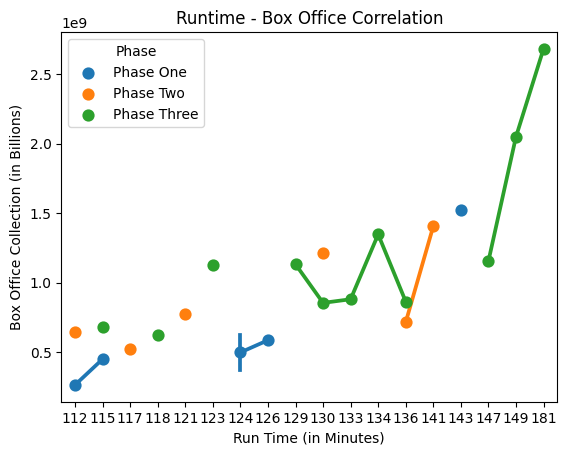

In [37]:
plot1 = sns.pointplot(
    x = infinitysaga["Movie Run Time"].str.slice(0,3).astype(int),
    y = infinitysaga["Box office"],
    hue = infinitysaga['Phase'],
    ).set_title("Runtime - Box Office Correlation")
pyplot.xlabel("Run Time (in Minutes)")
pyplot.ylabel("Box Office Collection (in Billions)")

Text(0.5, 0, 'Box Office Collection (in Billions)')

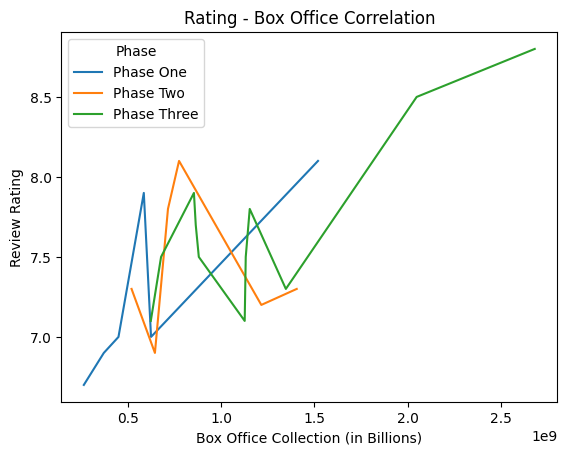

In [38]:
plot2 = sns.lineplot(
    x = infinitysaga["Box office"],
    y = infinitysaga["Review Rating"],
    hue = infinitysaga['Phase']
    ).set_title("Rating - Box Office Correlation")
pyplot.xlabel("Box Office Collection (in Billions)")

Text(0, 0.5, 'Budget (in 100 Millions)')

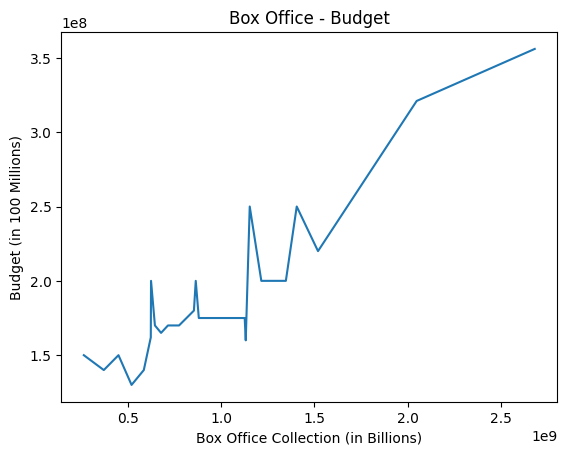

In [39]:
sns.lineplot(
    x = infinitysaga['Box office'].astype(int),
    y = infinitysaga['Budget'].astype(int))
pyplot.title("Box Office - Budget")
pyplot.xlabel("Box Office Collection (in Billions)")
pyplot.ylabel("Budget (in 100 Millions)")